### Задача 1
О непрерывной равномерно распределенной случайной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

In [122]:
# Дано:
# B - НСВ с равномерным распределением
d = 0.2
a = 0.5

In [123]:
# Найти:
# loc = ?
# b = ?

In [124]:
# d = (b - a) ** 2 / 12
# (b - 0.5) ** 2 / 12 = 0.2
# (b - 0.5) ** 2  = 1/60
# b ** 2 - b - 0.25 = 1/60
# b ** 2 - b = 1/60 + 0.25

In [125]:
spam = 1/60 + 0.25
spam

0.26666666666666666

In [143]:
# Подберем правую границу величины B методом перебора ее значения в
# полученном равенстве
b = 0

while b ** 2 - b < spam:
    b += 0.1
b

1.3

In [140]:
# Если производить перебор с шагом 0.1, то правая граница получается = 1.3,
# но если уменьшить шаг поиска, то граница сдвинется влево и существенно

In [141]:
# Матожидание loc
loc = (a + b) / 2
loc

0.9

### Задача 2

Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (numpy, scipy, pandas и пр.), а затем проверить себя с помощью встроенных функций

In [144]:
# Дано:
# X - НСВ с нормальным распределением, отражающая рост населения города
# loc - средний рост выборки = 174 см
# scale - среднее квадратическое отклонение = 8 см

In [145]:
loc = 174
scale = 8

Построю графики распределения и плотности распределения просто для отработки навыка

In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [147]:
samples = np.random.normal(loc, scale, size=10000)

In [148]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

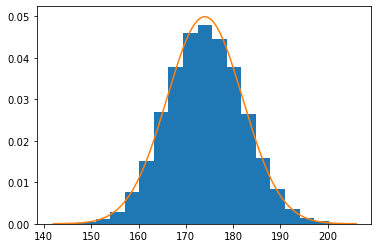

In [149]:
# Построим график плотности распределения
ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

In [150]:
def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

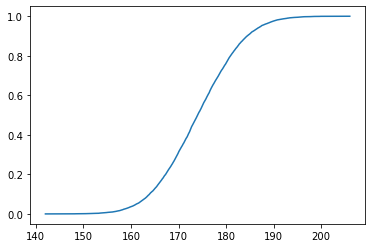

In [151]:
# Построим график распределения НСВ
oy = np.array([edf(samples, x) for x in ox])
plt.plot(ox, oy)

In [152]:
# Для поиска решений импортируем модуль stats
from scipy import stats

In [153]:
# 1. больше 182 см?
v1 = 1 - stats.norm.cdf(182, loc=loc, scale=scale)
v1

0.15865525393145707

In [154]:
# 2. больше 190 см?
v2 = 1 - stats.norm.cdf(190, loc=loc, scale=scale)
v2

0.02275013194817921

In [155]:
# 3. от 166 см до 190 см?
v3 = stats.norm.cdf(190, loc=loc, scale=scale) - stats.norm.cdf(166, loc=loc, scale=scale)
v3

0.8185946141203637

In [156]:
# 4. от 158 см до 190 см?
v4 = stats.norm.cdf(190, loc=loc, scale=scale) - stats.norm.cdf(158, loc=loc, scale=scale)
v4

0.9544997361036416

In [157]:
# 5. не выше 150 см или не ниже 190 см?
v5 = stats.norm.cdf(150, loc=loc, scale=scale) + (1 - stats.norm.cdf(190, loc=loc, scale=scale))
v5

0.0241000299798093

In [158]:
# 6. не выше 150 см или не ниже 198 см?
v6 = stats.norm.cdf(150, loc=loc, scale=scale) + (1 - stats.norm.cdf(198, loc=loc, scale=scale))
v6

0.0026997960632601965

In [159]:
# 7. ниже 166 см?
v7 = stats.norm.cdf(166, loc=loc, scale=scale)
v7

0.15865525393145707

### Задача 3 (Дополнительно)

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [160]:
loc = 1.06
scale = 1
m = stats.norm.cdf(1, loc=loc, scale=scale)

# а) среднее квадратическое отклонение массы коробки 
while m > 0.05:
    m = stats.norm.cdf(1, loc=loc, scale=scale)
    scale -= 0.0001
scale

0.03630000000009383

In [161]:
# б) процент коробок, имеющих массу больше 1.1 кг.
heavy = 1 - stats.norm.cdf(1.1, loc=loc, scale=scale)
heavy

0.13524640583647085